In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn import decomposition
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import plotly.graph_objects as go


In [327]:
train=pd.read_excel("C:/Users/harki/Desktop/MLH/Food_QUalityA_ParticipantsData/Data_Train.xlsx")
# test=pd.read_excel("C:/Users/harki/Desktop/MLH/Food_QUalityA_ParticipantsData/Data_Test.xlsx")

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147443 entries, 0 to 147442
Data columns (total 15 columns):
ID                    147443 non-null int64
Date                  147443 non-null object
LicenseNo             147443 non-null int64
FacilityID            147443 non-null int64
FacilityName          147443 non-null int64
Type                  143958 non-null object
Street                147443 non-null int64
City                  147443 non-null object
State                 147443 non-null object
LocationID            147408 non-null float64
Reason                147443 non-null object
SectionViolations     108375 non-null float64
RiskLevel             147443 non-null object
Geo_Loc               147443 non-null object
Inspection_Results    147443 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 16.9+ MB


In [69]:
train.shape

(147443, 9)

In [72]:
missing_df=train.isnull().sum(axis = 0).reset_index()
missing_df.columns = ['column_name', 'count']
missing_df.sort_values(by='count',ascending=False,inplace=True)
missing_df.head()
#SectionViolations has 26% missing values

,column_name,count
11,SectionViolations,39068
5,Type,3485
17,day,53
1,Date,53
16,month,53


In [92]:
train.head()

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results,year,month,day
0,31103489027986,2010-04-26,4744,8123,7715,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,High,locid16406,4,2010.0,4.0,26.0
1,10088999935915,2009-06-21,2973,12268,11664,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,High,locid878,4,2009.0,6.0,21.0
2,40148966010272,2013-01-05,18223,1112,969,RESTAURANT,14988,id-11235901,id_1890134,81883.0,CANVASS,NaN,High,locid3368,6,2013.0,1.0,5.0
3,37157708563676,2015-09-28,20825,20007,19115,RESTAURANT,3661,id-11235901,id_1890134,81859.0,CANVASS RE-INSPECTION,31.0,Medium,locid11839,4,2015.0,9.0,28.0
4,47478049564374,2015-09-12,2136,16867,10409,RESTAURANT,7876,id-11235901,id_1890134,81886.0,COMPLAINT,30.0,High,locid12264,4,2015.0,9.0,12.0


### Imputing missing values with most frequent data as all are categorical variables

In [252]:
imp =SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(train)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [328]:
col=train.columns
train=imp.transform(train)
train=pd.DataFrame(data=train,columns=col)

In [64]:
train.isnull().sum()

ID                    0
Date                  0
LicenseNo             0
FacilityID            0
FacilityName          0
Type                  0
Street                0
City                  0
State                 0
LocationID            0
Reason                0
SectionViolations     0
RiskLevel             0
Geo_Loc               0
Inspection_Results    0
dtype: int64

In [ ]:
## Data is from 1st feb 2009 till 31 dec 2017
## Data is for two unique states and city

In [6]:
train.columns

Index(['ID', 'Date', 'LicenseNo', 'FacilityID', 'FacilityName', 'Type',
       'Street', 'City', 'State', 'LocationID', 'Reason', 'SectionViolations',
       'RiskLevel', 'Geo_Loc', 'Inspection_Results'],
      dtype='object')

In [177]:
for i in train.columns:
    print(i,train[i].nunique())

ID 147443
Date 2507
LicenseNo 34384
FacilityID 25535
FacilityName 24348
Type 409
Street 17290
City 2
State 2
LocationID 104
Reason 17
SectionViolations 61
RiskLevel 4
Geo_Loc 16316
Inspection_Results 7


In [183]:
# cols=['Date', 'LicenseNo', 'FacilityID', 'FacilityName', 'Type',
#        'Street', 'City', 'State','LocationID', 'Reason', 'SectionViolations',
#        'RiskLevel', 'Geo_Loc', 'Inspection_Results']

In [184]:
train=train[cols]

### Date Features

In [254]:
train['Date'] = pd.to_datetime(train['Date'], dayfirst=True,errors='coerce',format='%d-%m-%Y')

In [255]:
train['year'] = train['Date'].dt.year 
train['month'] = train['Date'].dt.month 
train['day'] = train['Date'].dt.day 

In [256]:
train.dropna(inplace=True)

<Figure size 576x576 with 0 Axes>

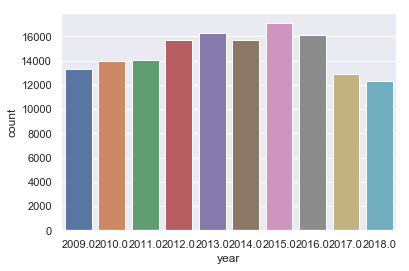

<Figure size 576x576 with 0 Axes>

In [292]:
sns.set(style="darkgrid")
ax = sns.countplot(x="year",data=train)
plt.figure(figsize=(8,8))


<Figure size 1080x720 with 0 Axes>

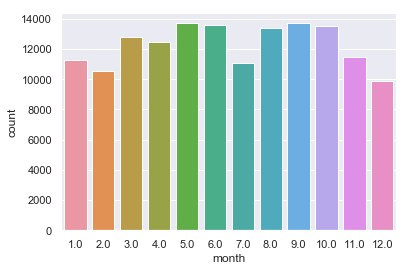

<Figure size 1080x720 with 0 Axes>

In [278]:
sns.set(style="darkgrid")
ax = sns.countplot(x="month",data=train)
plt.figure(figsize=(8,8))

In [323]:
train

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,LocationID,Reason,Geo_Loc,...,day_22.0,day_23.0,day_24.0,day_25.0,day_26.0,day_27.0,day_28.0,day_29.0,day_30.0,day_31.0
0,31103489027986,2010-04-26,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,10088999935915,2009-06-21,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,40148966010272,2013-05-01,2,2,2,0,2,2,0,2,...,0,0,0,0,0,0,0,0,0,0
3,37157708563676,2015-09-28,3,3,3,0,3,3,2,3,...,0,0,0,0,0,0,1,0,0,0
4,47478049564374,2015-12-09,4,4,4,0,4,4,1,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147438,32616888047244,2015-06-15,30719,23353,22273,1,8710,20,1,8525,...,0,0,0,0,0,0,0,0,0,0
147439,38335234403261,2010-11-28,10127,8818,8479,0,8121,48,11,7952,...,0,0,0,0,0,0,1,0,0,0
147440,42693381689429,2014-09-23,21674,17505,16769,0,1426,5,0,1418,...,0,1,0,0,0,0,0,0,0,0
147441,49087006944080,2018-01-25,5637,5054,4875,0,4900,57,2,4833,...,0,0,0,1,0,0,0,0,0,0


### SECTION 32 is violated the most

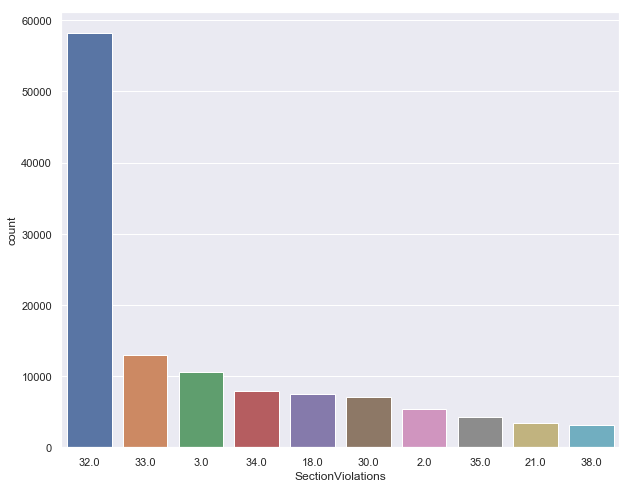

In [331]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x="SectionViolations",ax=ax,data=train,order=pd.value_counts(train['SectionViolations']).iloc[:10].index)

### CLEARLY ITS AN IMBALANCED DATASET WITH HIGHEST NUMBER OF RECORDS FOR INSPECTION 4 

<Figure size 576x576 with 0 Axes>

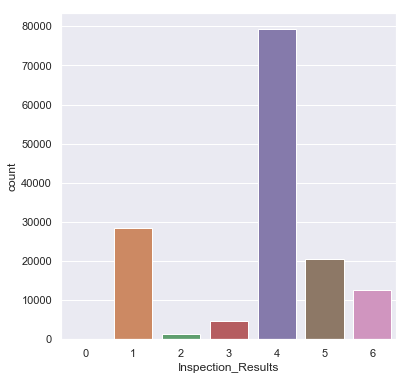

<Figure size 576x576 with 0 Axes>

In [298]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(6,6))
sns.countplot(x="Inspection_Results",data=train)
plt.figure(figsize=(8,8))

### Encoding categorical variables

In [299]:
cat_cols = ['FacilityID', 'FacilityName', 'Geo_Loc', 'LicenseNo',  'Street','LocationID','Reason','Type']
for k in cat_cols:
    train[k]=pd.factorize(train[k])[0]

In [300]:
train=pd.get_dummies(train,columns=['City', 'State',
       'SectionViolations', 'RiskLevel', 'year', 'month',
       'day'],drop_first=True)

In [303]:
x_cols=train.columns
X=train[x_cols]
X.drop(['Inspection_Results','Date','ID'],axis=1,inplace=True)
y= train['Inspection_Results']
y=y.astype('int')

In [305]:
print("Number transactions X dataset: ", X.shape)
print("Number transactions y dataset: ", y.shape)

Number transactions X dataset:  (147390, 123)
Number transactions y dataset:  (147390,)


In [306]:
l=y.unique()
for i in l:
    print("Before OverSampling, counts of label:{}".format(sum(y_train==i)))

Before OverSampling, counts of label:59421
Before OverSampling, counts of label:30009
Before OverSampling, counts of label:30101
Before OverSampling, counts of label:30108
Before OverSampling, counts of label:30037
Before OverSampling, counts of label:29938
Before OverSampling, counts of label:29975


### Dealing with imbalanced datset using SMOTE

In [ ]:
# sm = SMOTENC(random_state=42, categorical_features=[1, 2, 3, 4, 5,6])
# X_res, y_res = sm.fit_resample(X, y)

In [308]:
smt = SMOTE(sampling_strategy={0:40000,1:40000,2:40000,3:40000,4:79453,5:40000,6:40000})
X_res, y_res = smt.fit_sample(X, y)

C:\Users\harki\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:324: UserWarning:

After over-sampling, the number of samples (79453) in class 4 will be larger than the number of samples in the majority class (class #4 -> 79419)



In [309]:
print("Number transactions after SMOTE, X dataset: ", X_res.shape)
print("Number transactions after SMOTE, y dataset: ", y_res.shape)

Number transactions after SMOTE, X dataset:  (319453, 123)
Number transactions after SMOTE, y dataset:  (319453,)


### TRAIN,VAL,TEST DATA

In [243]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.25, random_state = 42)

In [219]:
model = tree.DecisionTreeClassifier(max_depth=5,random_state=5,criterion='gini')
model.fit(X_train, y_train)

In [160]:
## with few features
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.626841938640419

In [221]:
## with all features
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.5706628101076383

In [242]:
pca = decomposition.PCA()

# Create a logistic regression object with an L2 penalty
decisiontree = tree.DecisionTreeClassifier()

# Create a pipeline of three steps. First, standardize the data.
# Second, tranform the data with PCA.
# Third, train a Decision Tree Classifier on the data.
pipe = Pipeline(steps=[('decisiontree', decisiontree)])

# Create Parameter Space
# Create a list of a sequence of integers from 1 to 30 (the number of features in X + 1)
# n_components = list(range(1,X.shape[1]+1,1))

# Create lists of parameter for Decision Tree Classifier
criterion = ['gini']
max_depth = [5]

# Create a dictionary of all the parameter options 
# Note has you can access the parameters of steps of a pipeline by using '__’
parameters = dict(
                  decisiontree__criterion=criterion,
                  decisiontree__max_depth=max_depth)

# Conduct Parameter Optmization With Pipeline
# Create a grid search object
clf = GridSearchCV(pipe, parameters)

# Fit the grid search
clf.fit(X_res, y_res)

# View The Best Parameters
# print('Best Criterion:', clf.best_estimator_.get_params()['decisiontree__criterion'])
print('Best max_depth:', clf.best_estimator_.get_params()['decisiontree__max_depth'])
# print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])
print(); print(clf.best_estimator_.get_params()['decisiontree'])

# Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(clf, X_res, y_res, cv=5, n_jobs=-1)
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())

# Snippet_146()

Best max_depth: 5

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[0.55870154 0.58709364 0.57530795 0.56949444 0.55316951]

0.5687534164873101

0.012031403170997221


NameError: name 'Snippet_146' is not defined

# GBM

In [317]:
feat_imp[:15]

SectionViolations_32.0    0.222150
Reason                    0.182736
SectionViolations_33.0    0.064459
SectionViolations_18.0    0.045538
LicenseNo                 0.039063
SectionViolations_34.0    0.038300
SectionViolations_30.0    0.036165
SectionViolations_3.0     0.032203
SectionViolations_35.0    0.018782
SectionViolations_31.0    0.013850
year_2010                 0.013416
SectionViolations_21.0    0.013169
FacilityID                0.012620
SectionViolations_38.0    0.012073
SectionViolations_2.0     0.011624
dtype: float64

In [321]:
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)
predictors=list(X_train)

Text(0, 0.5, 'Feature Importance Score')

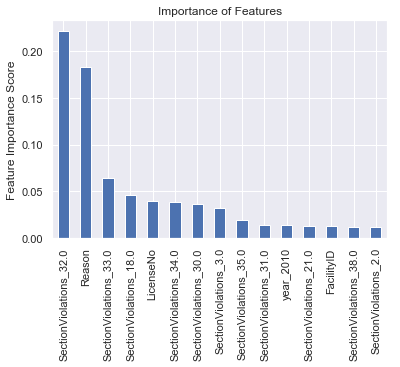

In [322]:
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp[:15].plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

In [247]:
y_predict = baseline.predict(X_test)
accuracy_score(y_test, y_predict)

0.723580086146449